<h1>Classification des Iris</h1>

<p>On veut à partir d'une certaine BDD prédire le type d'espèce d'Iris. Soit Versicolor, Virginica ou bien Setosa.
Pour cela, on peu prévoir à partir des dimensions des feuilles de ces chaque fleurs.</p>

In [45]:
#Importation des bibliothèque
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd



#Importation des bibliothèque machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
#Chargement des données
data_iris = pd.read_csv("iris.csv")

In [3]:
#J'utilise la fonction info afin de voir à quoi rensemble ma dataset
print(" LES INFORMATION SUR LA DATASET")
print(data_iris.info())

print("----------------------------------------------")

#Affiche les colonnes de ma dataset
print("LES COLONNES DE MA DATASET")
print(data_iris.columns)

print("--------------------------------------------")
print("TAILLE DE LA DATASET")
print(data_iris.shape)

 LES INFORMATION SUR LA DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
----------------------------------------------
LES COLONNES DE MA DATASET
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
--------------------------------------------
TAILLE DE LA DATASET
(150, 5)


<h3>Nettoyage des données</h3>

In [4]:
#On verifie que nous n'avons pas de ligne similaire.
print(data_iris[data_iris.duplicated()])

     sepal.length  sepal.width  petal.length  petal.width    variety
142           5.8          2.7           5.1          1.9  Virginica


<h2>Analyse exploratoire des données</h2>

In [5]:
print(data_iris.describe(include = "all"))

        sepal.length  sepal.width  petal.length  petal.width variety
count     150.000000   150.000000    150.000000   150.000000     150
unique           NaN          NaN           NaN          NaN       3
top              NaN          NaN           NaN          NaN  Setosa
freq             NaN          NaN           NaN          NaN      50
mean        5.843333     3.057333      3.758000     1.199333     NaN
std         0.828066     0.435866      1.765298     0.762238     NaN
min         4.300000     2.000000      1.000000     0.100000     NaN
25%         5.100000     2.800000      1.600000     0.300000     NaN
50%         5.800000     3.000000      4.350000     1.300000     NaN
75%         6.400000     3.300000      5.100000     1.800000     NaN
max         7.900000     4.400000      6.900000     2.500000     NaN


In [6]:
print("LES DIFFERENTES VARIETES D'IRIS")
print(data_iris["variety"])

LES DIFFERENTES VARIETES D'IRIS
0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


<h3>Visualisation graphique</h3>

Les target variety: setosa,Virginica,Versicolor

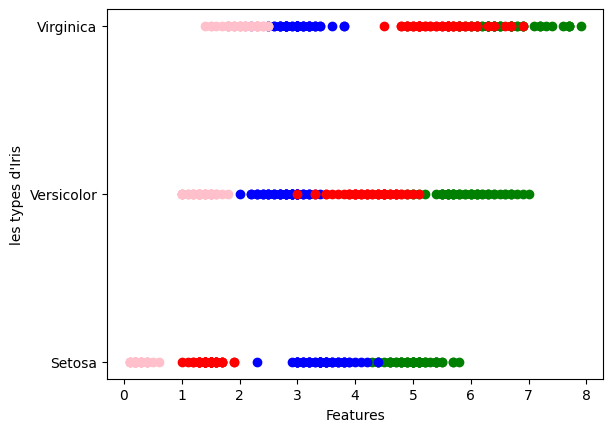

In [7]:
#Tracer chaque caractèristique en fonction du type

plt.xlabel("Features")
plt.ylabel("les types d'Iris")

#SEPAL
#Length
pltX = data_iris.loc[:, "variety"]
pltY = data_iris.loc[:, "sepal.length"]
plt.scatter(pltY, pltX, color = "green", label = "sepal.length")

#width
pltX = data_iris.loc[:, "variety"]
pltY = data_iris.loc[:, "sepal.width"]
plt.scatter(pltY, pltX, color = "blue", label = "sepal.width")




#PETAL
#Length
pltX = data_iris.loc[:, "variety"]
pltY = data_iris.loc[:, "petal.length"]
plt.scatter(pltY, pltX, color = "red", label = "petal.length")

#width
pltX = data_iris.loc[:, "variety"]
pltY = data_iris.loc[:, "petal.width"]
plt.scatter(pltY, pltX, color = "pink", label = "petal.width")



plt.show()

<p>On voit dans le graphique les 3 types de fleurs positionnés en fonction des Features. A savoir la caractèristique qui la longueur du Sepal</p>
<ul>
<p>Donc longueur Sépal:
<li> inferieur à 5.5 => Setosa</li>
<li>superieur à 5.5 => Virginica</li>
<li>Entre le 5 et 7 =>Versicolor</li>
</ul></p>


<p>On va faire en sorte de combiner la longueur et la largeur du sépal et de la pétal. Afin d'avoir simplement la taille du sépal et la taille de la pétale. Et de constater si des résultats différent peuvent en sortir.<p>

In [8]:
s_size = data_iris["sepal.length"] * data_iris["sepal.width"]
data_iris.insert(1, "sepal.size", s_size)

p_size = data_iris["petal.length"] * data_iris["petal.width"]
data_iris.insert(2, "petal.size", p_size)

In [9]:
data_iris.drop(["sepal.length", "sepal.width", "petal.length", "petal.width"],axis = 1, inplace = True)

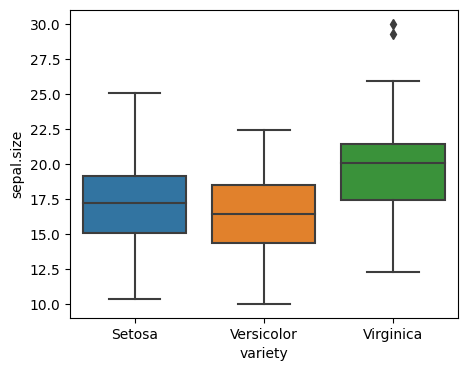

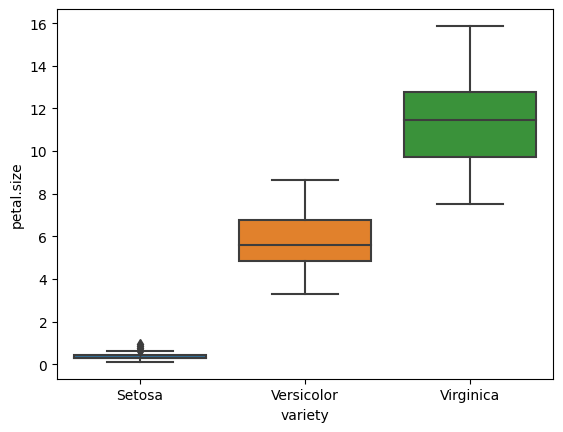

In [10]:
plt.figure(figsize=(5,4))
sns.boxplot(x = data_iris["variety"], y = data_iris["sepal.size"])
plt.show()
sns.boxplot(x = data_iris["variety"], y = data_iris["petal.size"])
plt.show()

[]

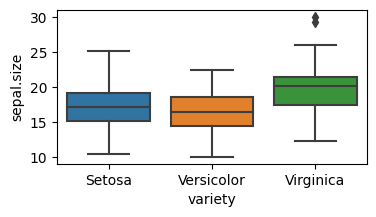

In [54]:
i = data_iris[(data_iris["variety"] == "Iris-virginica") & (data_iris["sepal.size"] > 27)].index
data_iris.drop(i, inplace = True)

plt.figure(figsize=(4,2))
sns.boxplot(x = data_iris["variety"], y = data_iris["sepal.size"])
plt.plot()

<p>Il resort de ces graphiques avec les données dont on dispose, que la fleur iris Virginica à une<br>taille 
de Sépal plus importante que les deux autres espèces.</p>

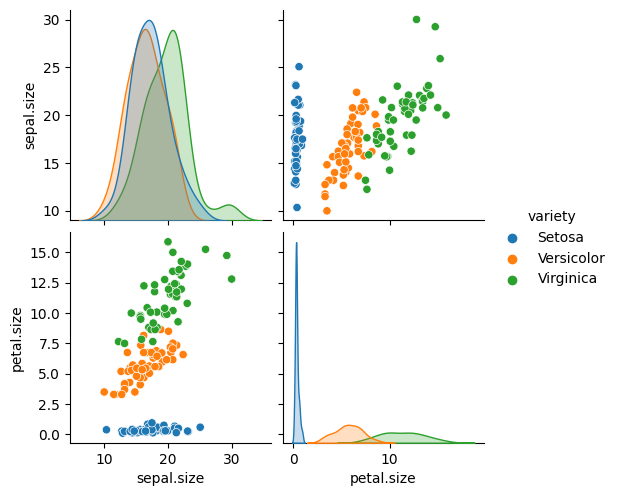

In [11]:
sns.pairplot(data_iris, hue = "variety")
plt.show()

<p>Selon les nuage de points, c'est en majorité le Sétosa qui dispose la taille du Sépal et de la pétail plus importante. <br> Mais selon la courbe des graphique obtenu. C'est le Sétosa qui domine en taille.</b>On peut en conclure que par exception. C'est le Sétosa qui possède des pétales et sépales plus importante que les deux autres variétés d'Iris. <p>

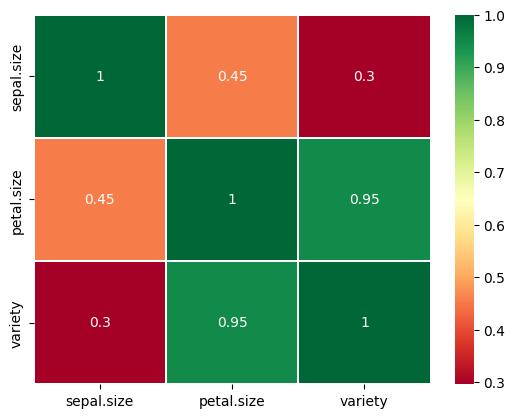

In [24]:
transform = LabelEncoder()
data_iris["variety"] = LabelEncoder().fit_transform(data_iris.variety)

sns.heatmap(data_iris.corr(), annot = True, cmap="RdYlGn", linewidths = 0.2, annot_kws={"size" : 10})
plt.show()

<AxesSubplot: >

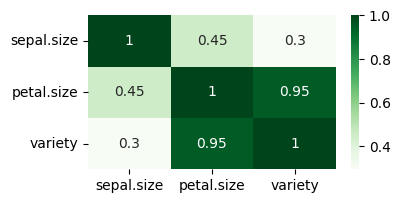

In [26]:
plt.figure(figsize=(4,2))
sns.heatmap(data_iris.corr(), annot = True, cmap = "Greens")

<h2>Partie entrainement</h2>

<p>Je veux séparer les données et la Target(varity). L'objectif c'est de deviné le type en fonction de la data.</p>

In [12]:
#Préparation des données d'entrainement
X = data_iris.iloc[:, :-1]
y = data_iris.iloc[:, -1]

print(X.head())
print(y.head())

#On a séparer les données(Sepal.size, pétal.size) et la Target

   sepal.size  petal.size
0       17.85        0.28
1       14.70        0.28
2       15.04        0.26
3       14.26        0.30
4       18.00        0.28
0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


<p>On va diviser les données. Il y aura la partie Train et la partie Test.</p>

In [34]:
#Division des données
# test_size de 0.2 c'est à dire 20% pour le test et donc 80 pour l'entrainement
#Pour le random_state on choisi une valeur aléatoire à savoir 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print("Taille de l'entrainement de X_train: ")
print(X_train.shape)
print("------------------------")
print("Taille de l'entrainement de X_test: ")
print(X_test.shape)

Taille de l'entrainement de X_train: 
(120, 2)
------------------------
Taille de l'entrainement de X_test: 
(30, 2)


<p>La taille de X_train c'est 120 et la taille de X_test c'est 30.</p>

<h3>Création du modèle d'entrainement</h3>

In [30]:
#Création du modèle d'entrainement
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

<h3>Test du modèle</h3>

In [31]:
#Test du modèle
predictions = model.predict(X_test)
print(predictions)
print(y_test)

['Setosa' 'Versicolor' 'Versicolor' 'Setosa' 'Virginica' 'Versicolor'
 'Virginica' 'Setosa' 'Setosa' 'Virginica' 'Versicolor' 'Setosa'
 'Virginica' 'Versicolor' 'Versicolor' 'Setosa' 'Versicolor' 'Versicolor'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Virginica' 'Setosa'
 'Virginica' 'Versicolor' 'Setosa' 'Setosa' 'Versicolor' 'Virginica']
14         Setosa
98     Versicolor
75     Versicolor
16         Setosa
131     Virginica
56     Versicolor
141     Virginica
44         Setosa
29         Setosa
120     Virginica
94     Versicolor
5          Setosa
102     Virginica
51     Versicolor
78     Versicolor
42         Setosa
92     Versicolor
66     Versicolor
31         Setosa
35         Setosa
90     Versicolor
84     Versicolor
77     Versicolor
40         Setosa
125     Virginica
99     Versicolor
33         Setosa
19         Setosa
73     Versicolor
146     Virginica
Name: variety, dtype: object


<h3>Evaluation du modèle</h3>

In [32]:
#Evaluation du modèle
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        11
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


<h2>K Neighbor Classification Model</h2>

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier( n_neighbors= 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


<h3>Matrix de confusion</h3>

In [47]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print(f"Accuracy score et de : {acc} \n\n {cm} \n\n {cr}")

Accuracy score et de : 1.0 

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 

               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      1.00      1.00         9
   Virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print(f"Entrainement Accuracy : {train_score} \n\n Test Accuracy {test_score}")

Entrainement Accuracy : 0.9583333333333334 

 Test Accuracy 1.0
